In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src/')
import stochastic_benchmark

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import glob

import df_utils
import interpolate
import random_exploration
import names

/home/robin/anaconda3/envs/stoch_bench/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


7600it [01:21, 92.82it/s] 


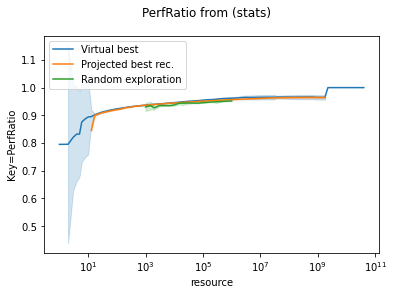

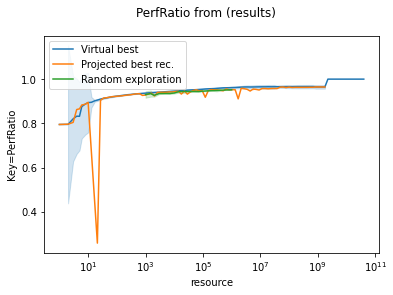

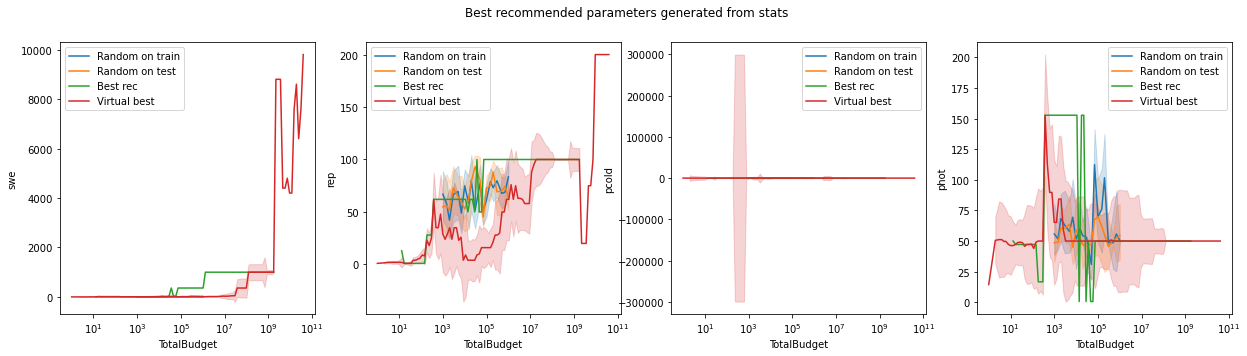

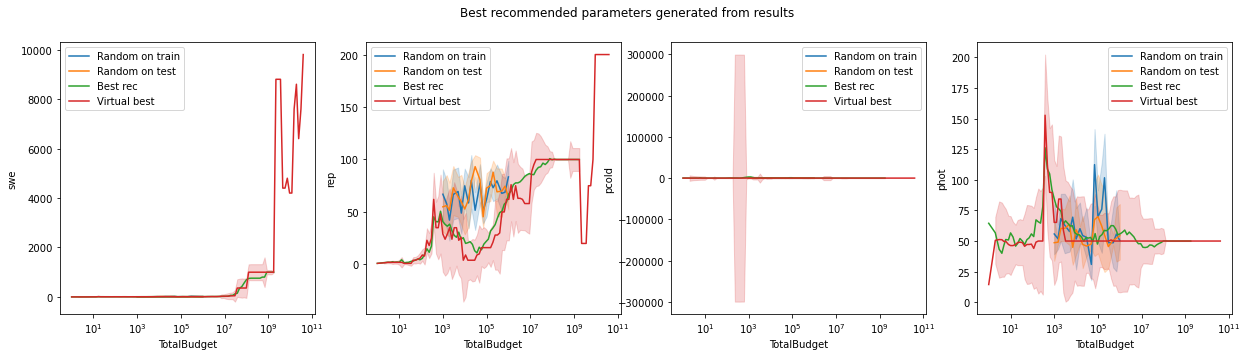

In [4]:
parameter_names = ['swe', 'rep', 'pcold', 'phot']
here = 'example_data/wishart_N=100_alpha=0.50'

def resource_fcn(df):
    return df['swe'] * df['rep'] * df['boots']
sb = stochastic_benchmark.stochastic_benchmark(parameter_names, here=here,\
                                               resource_fcn=resource_fcn)
sb.project_recs()
sb.run_random_exploration()
sb.plot_performance()
sb.plot_parameters()

7600it [02:32, 49.91it/s] 


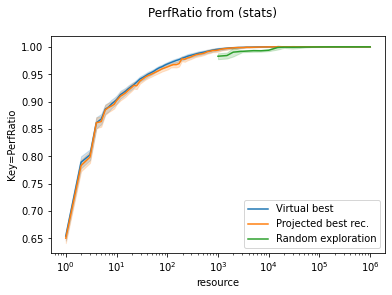

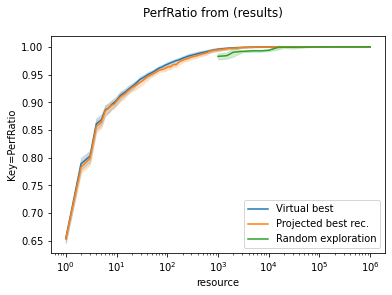

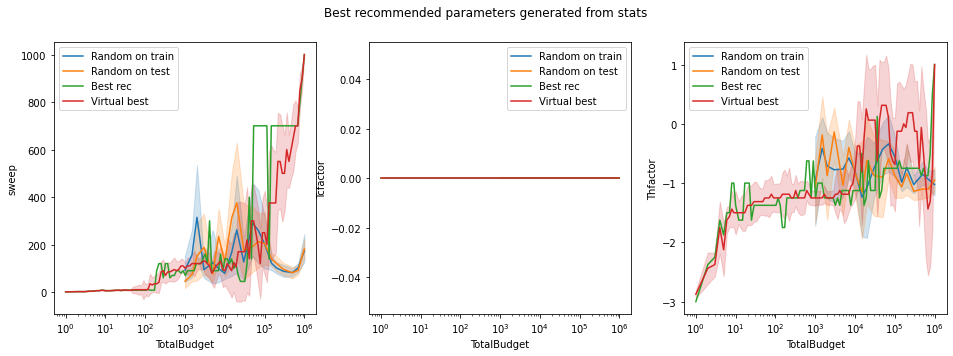

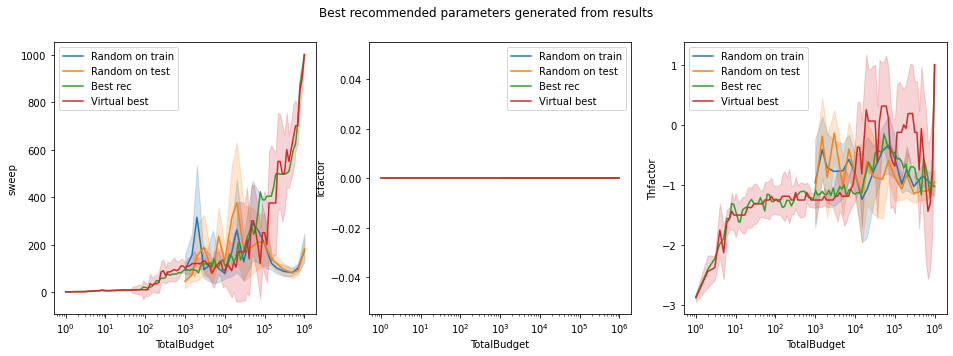

In [5]:
parameter_names = ['sweep', 'Tcfactor', 'Thfactor']
here = 'example_data/sk_pleiades_n=100'
sb = stochastic_benchmark.stochastic_benchmark(parameter_names, here=here)
sb.project_recs()
sb.run_random_exploration()
sb.plot_performance()
sb.plot_parameters()

7600it [02:30, 50.66it/s] 


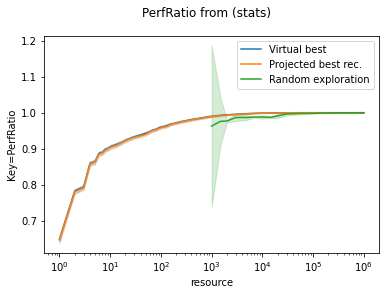

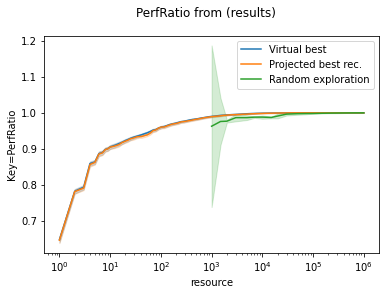

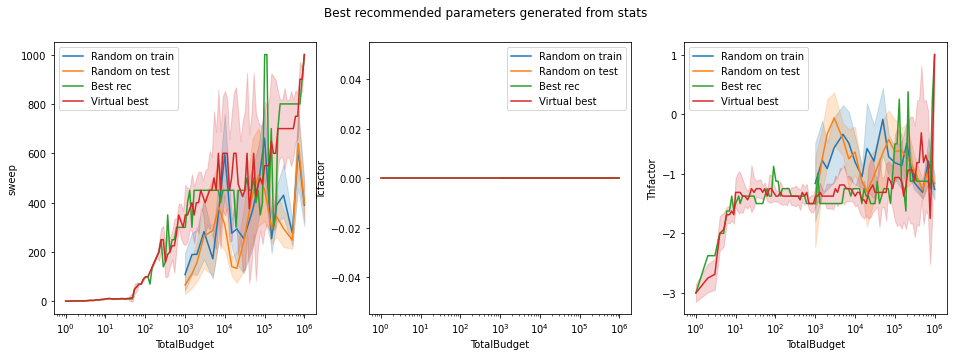

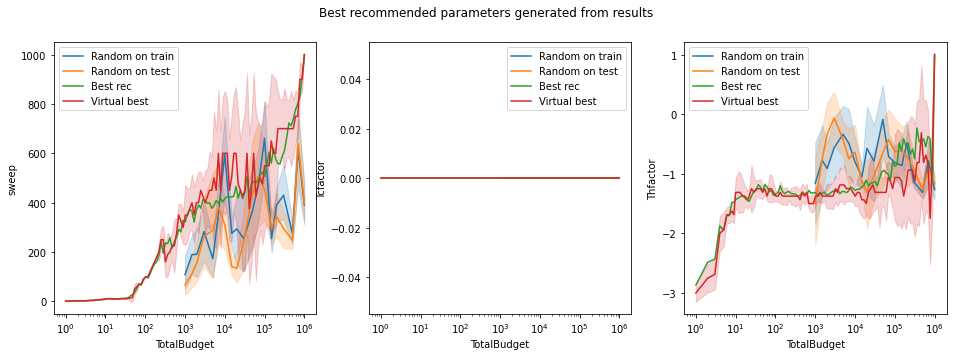

In [6]:
parameter_names = ['sweep', 'Tcfactor', 'Thfactor']
here = 'example_data/sk_pleiades_n=200'
sb = stochastic_benchmark.stochastic_benchmark(parameter_names, here=here)
sb.project_recs()
sb.run_random_exploration()
sb.plot_performance()
sb.plot_parameters()

In [99]:
for file in glob.glob('minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results*'):
    print(file)
    test = pd.read_pickle(file)
    display(test)

minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_virtual10train.pkl


,reads,virt_best_10_perf_ratio,envelope_perf_ratio,10_lazy_perf_ratio,10_perf_ratio
0,13,0.898004,0.907047,0.897308,0.897308
1,16,0.899516,0.908865,0.898749,0.898731
2,19,0.901675,0.910682,0.900946,0.900865
3,23,0.904671,0.912471,0.903875,0.903875
4,28,0.908446,0.914443,0.907536,0.907536
...,...,...,...,...,...
95,933767197,0.963539,0.968751,0.963539,0.963539
96,1129630626,0.963540,0.968756,0.963540,0.963540
97,1366577617,0.963540,0.968756,0.963540,0.963540
98,1653225700,0.963540,0.968756,0.963540,0.963540


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_progress_binary10train_end.pkl


,R_budget,R_explor,tau,experiment,10_perf_ratio,cum_reads,10_inv_perf_ratio,f_explor
24,1000.0,50,13,0,0.931876,884.0,0.931876,0.05
50,1000.0,50,13,1,0.889372,897.0,0.889372,0.05
76,1000.0,50,13,2,0.932015,897.0,0.932015,0.05
100,1000.0,50,13,3,0.932015,871.0,0.932015,0.05
126,1000.0,50,13,4,0.931876,897.0,0.931876,0.05
...,...,...,...,...,...,...,...,...
6725396,1000000.0,750000,10195,5,0.950668,958787.0,0.950668,0.75
6725500,1000000.0,750000,10195,6,0.950668,958787.0,0.950668,0.75
6725604,1000000.0,750000,10195,7,0.950668,958787.0,0.950668,0.75
6725704,1000000.0,750000,10195,8,0.951171,958787.0,0.951171,0.75


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_recipe_mean_best10train.pkl


,reads,swe,rep,pcold,phot,params,recipe,10_perf_ratio
0,13,14.0,1.0,1.00,50.0,"(14.0, 1.0, 1.0, 50.0)","(14.0, 1.0, 1.0, 50.0, 13.0)",0.897308
1,16,14.0,1.0,1.00,50.0,"(14.0, 1.0, 1.0, 50.0)","(14.0, 1.0, 1.0, 50.0, 16.0)",0.898731
2,19,14.0,1.0,1.00,50.0,"(14.0, 1.0, 1.0, 50.0)","(14.0, 1.0, 1.0, 50.0, 19.0)",0.900865
3,23,14.0,1.0,0.93,47.2,"(14.0, 1.0, 0.93, 47.2)","(14.0, 1.0, 0.93, 47.2, 23.0)",0.903875
4,28,14.0,1.0,0.93,47.2,"(14.0, 1.0, 0.93, 47.2)","(14.0, 1.0, 0.93, 47.2, 28.0)",0.907536
...,...,...,...,...,...,...,...,...
95,933767197,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 933767197.0)",0.963539
96,1129630626,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 1129630626.0)",0.963540
97,1366577617,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 1366577617.0)",0.963540
98,1653225700,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 1653225700.0)",0.963540


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_virtual50train.pkl


,reads,virt_best_50_perf_ratio,envelope_perf_ratio,50_lazy_perf_ratio,50_perf_ratio
0,13,0.899039,0.907047,0.898356,0.898356
1,16,0.901323,0.908865,0.899762,0.899762
2,19,0.904437,0.910682,0.901871,0.901871
3,23,0.908385,0.912471,0.904702,0.904702
4,28,0.910775,0.914443,0.908419,0.908419
...,...,...,...,...,...
95,933767197,0.964829,0.968751,0.964744,0.964744
96,1129630626,0.964830,0.968756,0.964744,0.964744
97,1366577617,0.964830,0.968756,0.964745,0.964745
98,1653225700,0.964830,0.968756,0.964746,0.964746


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_rep0_recipe_lazy50train.pkl


,reads,recipe,swe,rep,pcold,phot,50_perf_ratio
0,1,"(1.0, 98.0, 0.01, 0.1)",1.0,98.0,0.01,0.1,0.874423
1,2,"(2.0, 107.0, 94.87, 102.9)",2.0,107.0,94.87,102.9,0.913713
2,3,"(3.0, 104.0, 1.0, 50.0)",3.0,104.0,1.00,50.0,0.922610
3,4,"(4.0, 117.0, 1.13, 155.6)",4.0,117.0,1.13,155.6,0.930747
4,5,"(5.0, 127.0, 1.78, 42.1)",5.0,127.0,1.78,42.1,0.932290
...,...,...,...,...,...,...,...
95,10555059,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.964744
96,12383773,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.964745
97,14529321,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.964745
98,17046595,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.964746


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_rep0_recipe_mean_best50train.pkl


,reads,swe,rep,pcold,phot,params,recipe,50_perf_ratio
0,1,1.0,24.0,1.00,50.0,"(1.0, 24.0, 1.0, 50.0)","(1.0, 24.0, 1.0, 50.0, 1.0)",0.854882
1,2,2.0,107.0,94.87,102.9,"(2.0, 107.0, 94.87, 102.9)","(2.0, 107.0, 94.87, 102.9, 2.0)",0.913713
2,3,3.0,104.0,1.00,50.0,"(3.0, 104.0, 1.0, 50.0)","(3.0, 104.0, 1.0, 50.0, 3.0)",0.922610
3,4,4.0,117.0,1.13,155.6,"(4.0, 117.0, 1.13, 155.6)","(4.0, 117.0, 1.13, 155.6, 4.0)",0.930747
4,5,5.0,127.0,1.78,42.1,"(5.0, 127.0, 1.78, 42.1)","(5.0, 127.0, 1.78, 42.1, 5.0)",0.932290
...,...,...,...,...,...,...,...,...
95,10555059,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 10555059.0)",0.964744
96,12383773,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 12383773.0)",0.964745
97,14529321,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 14529321.0)",0.964745
98,17046595,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 17046595.0)",0.964746


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_progress_binary90train_end.pkl


,R_budget,R_explor,tau,experiment,90_perf_ratio,cum_reads,90_inv_perf_ratio,f_explor
24,1000.0,50,13,0,0.934963,884.0,0.934963,0.05
48,1000.0,50,13,1,0.934963,871.0,0.934963,0.05
74,1000.0,50,13,2,0.893507,897.0,0.893507,0.05
100,1000.0,50,13,3,0.893507,897.0,0.893507,0.05
125,1000.0,50,13,4,0.893507,884.0,0.893507,0.05
...,...,...,...,...,...,...,...,...
6722531,1000000.0,750000,10195,5,0.950906,958787.0,0.950906,0.75
6722656,1000000.0,750000,10195,6,0.950906,958787.0,0.950906,0.75
6722779,1000000.0,750000,10195,7,0.951820,958787.0,0.951820,0.75
6722904,1000000.0,750000,10195,8,0.950906,958787.0,0.950906,0.75


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_recipe_mean_best50train.pkl


,reads,swe,rep,pcold,phot,params,recipe,50_perf_ratio
0,13,14.0,1.0,1.00,50.0,"(14.0, 1.0, 1.0, 50.0)","(14.0, 1.0, 1.0, 50.0, 13.0)",0.898356
1,16,14.0,1.0,1.00,50.0,"(14.0, 1.0, 1.0, 50.0)","(14.0, 1.0, 1.0, 50.0, 16.0)",0.899762
2,19,14.0,1.0,1.00,50.0,"(14.0, 1.0, 1.0, 50.0)","(14.0, 1.0, 1.0, 50.0, 19.0)",0.901871
3,23,14.0,1.0,0.93,47.2,"(14.0, 1.0, 0.93, 47.2)","(14.0, 1.0, 0.93, 47.2, 23.0)",0.904702
4,28,14.0,1.0,0.93,47.2,"(14.0, 1.0, 0.93, 47.2)","(14.0, 1.0, 0.93, 47.2, 28.0)",0.908419
...,...,...,...,...,...,...,...,...
95,933767197,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 933767197.0)",0.964744
96,1129630626,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 1129630626.0)",0.964744
97,1366577617,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 1366577617.0)",0.964745
98,1653225700,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 1653225700.0)",0.964746


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_recipe_lazy50train.pkl


,reads,recipe,swe,rep,pcold,phot,50_perf_ratio
0,13,"(14.0, 1.0, 1.0, 50.0)",14.0,1.0,1.00,50.0,0.898356
1,16,"(14.0, 1.0, 1.0, 50.0)",14.0,1.0,1.00,50.0,0.899762
2,19,"(14.0, 1.0, 1.0, 50.0)",14.0,1.0,1.00,50.0,0.901871
3,23,"(14.0, 1.0, 0.93, 47.2)",14.0,1.0,0.93,47.2,0.904702
4,28,"(14.0, 1.0, 0.93, 47.2)",14.0,1.0,0.93,47.2,0.908419
...,...,...,...,...,...,...,...
95,933767197,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.964744
96,1129630626,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.964744
97,1366577617,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.964745
98,1653225700,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.964746


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_recipe_mean_best90train.pkl


,reads,swe,rep,pcold,phot,params,recipe,90_perf_ratio
0,13,14.0,1.0,1.00,50.0,"(14.0, 1.0, 1.0, 50.0)","(14.0, 1.0, 1.0, 50.0, 13.0)",0.899188
1,16,14.0,1.0,1.00,50.0,"(14.0, 1.0, 1.0, 50.0)","(14.0, 1.0, 1.0, 50.0, 16.0)",0.900616
2,19,14.0,1.0,1.00,50.0,"(14.0, 1.0, 1.0, 50.0)","(14.0, 1.0, 1.0, 50.0, 19.0)",0.902758
3,23,14.0,1.0,0.93,47.2,"(14.0, 1.0, 0.93, 47.2)","(14.0, 1.0, 0.93, 47.2, 23.0)",0.905575
4,28,14.0,1.0,0.93,47.2,"(14.0, 1.0, 0.93, 47.2)","(14.0, 1.0, 0.93, 47.2, 28.0)",0.909184
...,...,...,...,...,...,...,...,...
95,933767197,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 933767197.0)",0.968343
96,1129630626,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 1129630626.0)",0.968344
97,1366577617,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 1366577617.0)",0.968344
98,1653225700,1000.0,100.0,1.00,50.0,"(1000.0, 100.0, 1.0, 50.0)","(1000.0, 100.0, 1.0, 50.0, 1653225700.0)",0.968344


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_recipe_lazy90train.pkl


,reads,recipe,swe,rep,pcold,phot,90_perf_ratio
0,13,"(14.0, 1.0, 1.0, 50.0)",14.0,1.0,1.0,50.0,0.899188
1,16,"(14.0, 1.0, 1.0, 50.0)",14.0,1.0,1.0,50.0,0.900616
2,19,"(14.0, 1.0, 1.0, 50.0)",14.0,1.0,1.0,50.0,0.902758
3,23,"(14.0, 1.0, 1.0, 50.0)",14.0,1.0,1.0,50.0,0.905615
4,28,"(14.0, 1.0, 1.0, 50.0)",14.0,1.0,1.0,50.0,0.909186
...,...,...,...,...,...,...,...
95,933767197,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.0,50.0,0.968343
96,1129630626,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.0,50.0,0.968344
97,1366577617,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.0,50.0,0.968344
98,1653225700,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.0,50.0,0.968344


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_recipe_lazy10train.pkl


,reads,recipe,swe,rep,pcold,phot,10_perf_ratio
0,13,"(14.0, 1.0, 1.0, 50.0)",14.0,1.0,1.00,50.0,0.897308
1,16,"(14.0, 1.0, 0.93, 47.2)",14.0,1.0,0.93,47.2,0.898749
2,19,"(14.0, 1.0, 0.93, 47.2)",14.0,1.0,0.93,47.2,0.900946
3,23,"(14.0, 1.0, 0.93, 47.2)",14.0,1.0,0.93,47.2,0.903875
4,28,"(14.0, 1.0, 0.93, 47.2)",14.0,1.0,0.93,47.2,0.907536
...,...,...,...,...,...,...,...
95,933767197,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.963539
96,1129630626,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.963540
97,1366577617,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.963540
98,1653225700,"(1000.0, 100.0, 1.0, 50.0)",1000.0,100.0,1.00,50.0,0.963540


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_virtual90train.pkl


,reads,virt_best_90_perf_ratio,envelope_perf_ratio,90_lazy_perf_ratio,90_perf_ratio
0,13,0.907090,0.907047,0.899188,0.899188
1,16,0.909054,0.908865,0.900616,0.900616
2,19,0.911673,0.910682,0.902758,0.902758
3,23,0.913010,0.912471,0.905615,0.905575
4,28,0.914762,0.914443,0.909186,0.909184
...,...,...,...,...,...
95,933767197,0.968534,0.968751,0.968343,0.968343
96,1129630626,0.968538,0.968756,0.968344,0.968344
97,1366577617,0.968538,0.968756,0.968344,0.968344
98,1653225700,0.968538,0.968756,0.968344,0.968344


minimal_results/wishart_planting_N_100_alpha_0.50_inst_df_results_progress_binary50train_end.pkl


,R_budget,R_explor,tau,experiment,50_perf_ratio,cum_reads,50_inv_perf_ratio,f_explor
24,1000.0,50,13,0,0.933432,884.0,0.933432,0.05
49,1000.0,50,13,1,0.933633,884.0,0.933633,0.05
74,1000.0,50,13,2,0.933432,884.0,0.933432,0.05
100,1000.0,50,13,3,0.891518,897.0,0.891518,0.05
125,1000.0,50,13,4,0.890381,884.0,0.890381,0.05
...,...,...,...,...,...,...,...,...
6726134,1000000.0,750000,10195,5,0.952484,958787.0,0.952484,0.75
6726241,1000000.0,750000,10195,6,0.952234,958787.0,0.952234,0.75
6726342,1000000.0,750000,10195,7,0.952484,958787.0,0.952484,0.75
6726449,1000000.0,750000,10195,8,0.952234,958787.0,0.952234,0.75
